#### Optimasi Forecasting Dengan Kalman Filter

#### Load Dataset

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
df = pd.read_excel('REVENUE Hotel W - 5 Years.xlsx')

df

,DATE,ROOMSOLD,AVGROOMRATE,REVPAR,ROOMREV,OCCUP
0,2018-04-30,3457,324006,255728,1120089744,78.9
1,2018-05-30,1145,314689,169164,360318744,53.8
2,2018-06-30,866,330079,134201,285848068,40.7
3,2018-07-31,918,324456,135325,297850156,41.7
4,2018-08-31,1265,344343,197907,435594013,57.5
...,...,...,...,...,...,...
68,2024-01-31,1188,297997,160845,354020799,54.0
69,2024-02-29,1117,283772,153945,316972920,54.2
70,2024-03-31,1317,281471,168422,370696751,59.8
71,2024-04-30,1285,305175,184108,392149739,60.3


#### Feature Selection

In [3]:
var_indep = df[['ROOMSOLD','REVPAR','ROOMREV']].values
var_depend = df[['OCCUP']].values

#### Normalization

In [4]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0,1))

scaled_X = min_max_scaler.fit_transform(var_indep)
scaled_Y = min_max_scaler.fit_transform(var_depend)

In [5]:
scaled_X

array([[1.00000000e+00, 8.56620436e-01, 1.00000000e+00],
       [2.87958115e-01, 5.29933013e-01, 2.82465037e-01],
       [2.02032646e-01, 3.97984716e-01, 2.12134222e-01],
       [2.18047428e-01, 4.02226625e-01, 2.23469108e-01],
       [3.24915306e-01, 6.38407397e-01, 3.53555717e-01],
       [2.59316292e-01, 4.68368714e-01, 2.49650523e-01],
       [3.32614721e-01, 5.92116237e-01, 3.28058126e-01],
       [2.85494302e-01, 5.23755071e-01, 2.79172985e-01],
       [2.51308901e-01, 4.65874139e-01, 2.58525647e-01],
       [2.76562981e-01, 5.32182281e-01, 2.95047367e-01],
       [4.02217431e-01, 8.91974715e-01, 4.39890211e-01],
       [4.96458269e-01, 1.00000000e+00, 5.52716103e-01],
       [4.02833385e-01, 8.45532597e-01, 4.50686835e-01],
       [4.40714506e-01, 8.74852345e-01, 4.83786594e-01],
       [4.07453034e-01, 8.41135956e-01, 4.48342630e-01],
       [3.63104404e-01, 6.17295971e-01, 3.41927217e-01],
       [4.08376963e-01, 6.71478441e-01, 3.71769577e-01],
       [3.87434555e-01, 6.26315

In [6]:
scaled_Y

array([[0.94650206],
       [0.60219479],
       [0.42249657],
       [0.43621399],
       [0.65294925],
       [0.54183813],
       [0.66803841],
       [0.59670782],
       [0.50342936],
       [0.55418381],
       [0.91083676],
       [1.        ],
       [0.84224966],
       [0.88751715],
       [0.85185185],
       [0.7297668 ],
       [0.82167353],
       [0.80932785],
       [0.83950617],
       [0.77640604],
       [0.77503429],
       [0.62962963],
       [0.76131687],
       [0.50205761],
       [0.        ],
       [0.03155007],
       [0.25788752],
       [0.21262003],
       [0.19478738],
       [0.23593964],
       [0.3223594 ],
       [0.48148148],
       [0.37585734],
       [0.36625514],
       [0.40740741],
       [0.4266118 ],
       [0.37997257],
       [0.478738  ],
       [0.36076818],
       [0.38545953],
       [0.50754458],
       [0.5308642 ],
       [0.35116598],
       [0.40603567],
       [0.29218107],
       [0.34430727],
       [0.45404664],
       [0.378

In [7]:
scaled_X.shape

(73, 3)

In [8]:
scaled_Y.shape

(73, 1)

In [54]:
from sklearn.model_selection import train_test_split

# Membagi data latih dan data uji
data_train, data_test = train_test_split(scaled_Y ,test_size=0.1, shuffle=False)

#### Prediksi Dengan Kalman Filter

In [55]:
from filterpy.kalman import KalmanFilter

# Inisialisasi Kalman Filter
kf = KalmanFilter(dim_x=2, dim_z=1)
kf.x = np.array([0., 0.])  # Keadaan awal (posisi dan kecepatan)
kf.P *= 1000.              # Ketidakpastian awal
kf.F = np.array([[1, 1], [0, 1]])  # Matriks transisi
kf.H = np.array([[1, 0],[0,1]])  # Matriks pengukuran
kf.R = 0.05                   # Ketidakpastian pengukuran
kf.Q = np.array([[1, 0], [0, 1]])  # Ketidakpastian proses

# Terapkan Kalman Filter pada data latih
filtered_state_means = []
for z in data_train:
    kf.predict()
    kf.update(z)
    filtered_state_means.append(kf.x[0])

print("Keadaan terfilter pada data latih:", filtered_state_means)



Keadaan terfilter pada data latih: [0.946454782102393, 0.6680191597493901, 0.46920276675997197, 0.4576209266093388, 0.6552333531417733, 0.577235355108826, 0.6836355825550939, 0.6310743955009105, 0.5390278513809379, 0.5744402048901349, 0.9062494536880359, 1.0284765550080328, 0.8984836447418683, 0.9242428263043796, 0.8946251333317304, 0.7789166093607438, 0.8492402008619372, 0.8464556391236011, 0.8738287783158332, 0.8192148405233663, 0.8113135983194956, 0.6768323771484063, 0.781402167741177, 0.5560496279330867, 0.06762135098824196, 0.037194847890769156, 0.24133295126576834, 0.2245905874033972, 0.20617940671650825, 0.24172919586546857, 0.32540884945692994, 0.4817017637900597, 0.4037173920378594, 0.38541630921692493, 0.4209794873981996, 0.4429390985185997, 0.40278233125664414, 0.48859192271613944, 0.39069942093205967, 0.4014679531661847, 0.514884225420591, 0.5500904509147675, 0.38936089263974316, 0.42019956336006575, 0.3194009103078237, 0.3550085433314852, 0.46010887219306634, 0.40361072630

In [56]:
# Terapkan Kalman Filter pada data uji
predicted_states = []
for z in scaled_Y:
    kf.predict()
    kf.update(z)
    predicted_states.append(kf.x[0])

print("Keadaan terprediksi pada data uji:", predicted_states)

Keadaan terprediksi pada data uji: [0.9617730164483257, 0.6699372704676971, 0.4694360464455185, 0.4576492957665075, 0.6552368031229158, 0.577235774661998, 0.6836356335770728, 0.6310744017057076, 0.539027852135505, 0.5744402049818981, 0.9062494536991952, 1.02847655500939, 0.8984836447420335, 0.9242428263043997, 0.8946251333317329, 0.778916609360744, 0.8492402008619372, 0.8464556391236011, 0.8738287783158332, 0.8192148405233663, 0.8113135983194956, 0.6768323771484063, 0.781402167741177, 0.5560496279330867, 0.06762135098824196, 0.037194847890769156, 0.24133295126576834, 0.2245905874033972, 0.20617940671650825, 0.24172919586546857, 0.32540884945692994, 0.4817017637900597, 0.4037173920378594, 0.38541630921692493, 0.4209794873981996, 0.4429390985185997, 0.40278233125664414, 0.48859192271613944, 0.39069942093205967, 0.4014679531661847, 0.514884225420591, 0.5500904509147675, 0.38936089263974316, 0.42019956336006575, 0.3194009103078237, 0.3550085433314852, 0.46010887219306634, 0.403610726309051

In [57]:
predicted_states = np.array(predicted_states)

predicted_states

array([0.96177302, 0.66993727, 0.46943605, 0.4576493 , 0.6552368 ,
       0.57723577, 0.68363563, 0.6310744 , 0.53902785, 0.5744402 ,
       0.90624945, 1.02847656, 0.89848364, 0.92424283, 0.89462513,
       0.77891661, 0.8492402 , 0.84645564, 0.87382878, 0.81921484,
       0.8113136 , 0.67683238, 0.78140217, 0.55604963, 0.06762135,
       0.03719485, 0.24133295, 0.22459059, 0.20617941, 0.2417292 ,
       0.32540885, 0.48170176, 0.40371739, 0.38541631, 0.42097949,
       0.4429391 , 0.40278233, 0.48859192, 0.39069942, 0.40146795,
       0.51488423, 0.55009045, 0.38936089, 0.42019956, 0.31940091,
       0.35500854, 0.46010887, 0.40361073, 0.51892369, 0.37675331,
       0.5912351 , 0.39184525, 0.47718485, 0.59966973, 0.60952665,
       0.72283206, 0.69882239, 0.61780576, 0.57646265, 0.702436  ,
       0.62328371, 0.82275589, 0.83189824, 0.77380763, 0.76170471,
       0.67961681, 0.68097071, 0.78442468, 0.65088914, 0.6371691 ,
       0.70603965, 0.72071315, 0.7224976 ])

In [58]:
predicted_states = predicted_states.reshape(1,-1)

predicted_states

array([[0.96177302, 0.66993727, 0.46943605, 0.4576493 , 0.6552368 ,
        0.57723577, 0.68363563, 0.6310744 , 0.53902785, 0.5744402 ,
        0.90624945, 1.02847656, 0.89848364, 0.92424283, 0.89462513,
        0.77891661, 0.8492402 , 0.84645564, 0.87382878, 0.81921484,
        0.8113136 , 0.67683238, 0.78140217, 0.55604963, 0.06762135,
        0.03719485, 0.24133295, 0.22459059, 0.20617941, 0.2417292 ,
        0.32540885, 0.48170176, 0.40371739, 0.38541631, 0.42097949,
        0.4429391 , 0.40278233, 0.48859192, 0.39069942, 0.40146795,
        0.51488423, 0.55009045, 0.38936089, 0.42019956, 0.31940091,
        0.35500854, 0.46010887, 0.40361073, 0.51892369, 0.37675331,
        0.5912351 , 0.39184525, 0.47718485, 0.59966973, 0.60952665,
        0.72283206, 0.69882239, 0.61780576, 0.57646265, 0.702436  ,
        0.62328371, 0.82275589, 0.83189824, 0.77380763, 0.76170471,
        0.67961681, 0.68097071, 0.78442468, 0.65088914, 0.6371691 ,
        0.70603965, 0.72071315, 0.7224976 ]])

In [59]:
predicted_states = min_max_scaler.inverse_transform(predicted_states)

predicted_states

array([[80.0132529 , 58.73842702, 44.12188779, 43.26263366, 57.66676295,
        51.98048797, 59.73703769, 55.90532388, 49.19513042, 51.77669094,
        75.96558517, 84.87594086, 75.3994577 , 77.27730204, 75.11817222,
        66.68302082, 71.80961064, 71.60661609, 73.60211794, 69.62076187,
        69.04476132, 59.24108029, 66.86421803, 50.43601788, 14.82959649,
        12.61150441, 27.49317215, 26.27265382, 24.93047875, 27.52205838,
        33.62230513, 45.01605858, 39.33099788, 37.99684894, 40.58940463,
        42.19026028, 39.26283195, 45.51835117, 38.38198779, 39.16701379,
        47.43506003, 50.00159387, 38.28440907, 40.53254817, 33.18432636,
        35.78012281, 43.44193678, 39.32322195, 47.72953674, 37.36531646,
        53.00103914, 38.46551899, 44.68677587, 53.61592368, 54.33449292,
        62.59445734, 60.84415201, 54.9380396 , 51.92412735, 61.10758461,
        55.33738264, 69.87890402, 70.54538174, 66.31057595, 65.42827311,
        59.44406526, 59.54276465, 67.08455941, 57.3

In [60]:
data_test = min_max_scaler.inverse_transform(data_test)

data_test

array([[56.5],
       [57.4],
       [65.6],
       [54. ],
       [54.2],
       [59.8],
       [60.3],
       [60.3]])

In [61]:
data_test = data_test.reshape(-1,1)

data_test

array([[56.5],
       [57.4],
       [65.6],
       [54. ],
       [54.2],
       [59.8],
       [60.3],
       [60.3]])

In [62]:
predicted_states = predicted_states.reshape(-1,1)

predicted_states

array([[80.0132529 ],
       [58.73842702],
       [44.12188779],
       [43.26263366],
       [57.66676295],
       [51.98048797],
       [59.73703769],
       [55.90532388],
       [49.19513042],
       [51.77669094],
       [75.96558517],
       [84.87594086],
       [75.3994577 ],
       [77.27730204],
       [75.11817222],
       [66.68302082],
       [71.80961064],
       [71.60661609],
       [73.60211794],
       [69.62076187],
       [69.04476132],
       [59.24108029],
       [66.86421803],
       [50.43601788],
       [14.82959649],
       [12.61150441],
       [27.49317215],
       [26.27265382],
       [24.93047875],
       [27.52205838],
       [33.62230513],
       [45.01605858],
       [39.33099788],
       [37.99684894],
       [40.58940463],
       [42.19026028],
       [39.26283195],
       [45.51835117],
       [38.38198779],
       [39.16701379],
       [47.43506003],
       [50.00159387],
       [38.28440907],
       [40.53254817],
       [33.18432636],
       [35

In [63]:
# from sklearn.metrics import mean_squared_error
# from math import sqrt

# mse_kf = mean_squared_error(y_pred=predicted_states,y_true=data_test)
# rmse_kf = sqrt(mse_kf)

# print('MSE KF : ',mse_kf)
# print('RMSE KF : ',rmse_kf)

In [64]:
# predicted_states = []
# for z in scaled_Y:
#     kf.predict()
#     kf.update(z)
#     predicted_states.append(kf.x[0])

# print("Keadaan terprediksi pada data uji:", predicted_states)

In [65]:
# predicted_states = np.array(predicted_states)

# predicted_states = predicted_states.reshape(-1,1)

# predicted_states

In [66]:
# predicted_states = min_max_scaler.inverse_transform(predicted_states)

# predicted_states

In [67]:
predicted_states = predicted_states.reshape(-1)

predicted_states

array([80.0132529 , 58.73842702, 44.12188779, 43.26263366, 57.66676295,
       51.98048797, 59.73703769, 55.90532388, 49.19513042, 51.77669094,
       75.96558517, 84.87594086, 75.3994577 , 77.27730204, 75.11817222,
       66.68302082, 71.80961064, 71.60661609, 73.60211794, 69.62076187,
       69.04476132, 59.24108029, 66.86421803, 50.43601788, 14.82959649,
       12.61150441, 27.49317215, 26.27265382, 24.93047875, 27.52205838,
       33.62230513, 45.01605858, 39.33099788, 37.99684894, 40.58940463,
       42.19026028, 39.26283195, 45.51835117, 38.38198779, 39.16701379,
       47.43506003, 50.00159387, 38.28440907, 40.53254817, 33.18432636,
       35.78012281, 43.44193678, 39.32322195, 47.72953674, 37.36531646,
       53.00103914, 38.46551899, 44.68677587, 53.61592368, 54.33449292,
       62.59445734, 60.84415201, 54.9380396 , 51.92412735, 61.10758461,
       55.33738264, 69.87890402, 70.54538174, 66.31057595, 65.42827311,
       59.44406526, 59.54276465, 67.08455941, 57.34981844, 56.34

In [68]:
df_pred_kf = pd.DataFrame({'Prediction KF 90-10':predicted_states})

df_pred_kf

,Prediction KF 90-10
0,80.013253
1,58.738427
2,44.121888
3,43.262634
4,57.666763
...,...
68,57.349818
69,56.349627
70,61.370291
71,62.439989


In [69]:
# df.drop(columns='Prediction KF 80-20',axis=1,inplace=True)

In [70]:
# df.drop(columns='Prediction KF 75-25',axis=1,inplace=True)

In [71]:
df = df.merge(df_pred_kf,how='left',left_index=True,right_index=True)

df

,DATE,ROOMSOLD,AVGROOMRATE,REVPAR,ROOMREV,OCCUP,Prediction KF 70-30,Prediction KF 80-20,Prediction KF 90-10
0,2018-04-30,3457,324006,255728,1120089744,78.9,78.501973,78.737533,80.013253
1,2018-05-30,1145,314689,169164,360318744,53.8,58.554640,58.583286,58.738427
2,2018-06-30,866,330079,134201,285848068,40.7,44.099537,44.103021,44.121888
3,2018-07-31,918,324456,135325,297850156,41.7,43.259916,43.260339,43.262634
4,2018-08-31,1265,344343,197907,435594013,57.5,57.666432,57.666484,57.666763
...,...,...,...,...,...,...,...,...,...
68,2024-01-31,1188,297997,160845,354020799,54.0,57.349818,57.349818,57.349818
69,2024-02-29,1117,283772,153945,316972920,54.2,56.349627,56.349627,56.349627
70,2024-03-31,1317,281471,168422,370696751,59.8,61.370291,61.370291,61.370291
71,2024-04-30,1285,305175,184108,392149739,60.3,62.439989,62.439989,62.439989


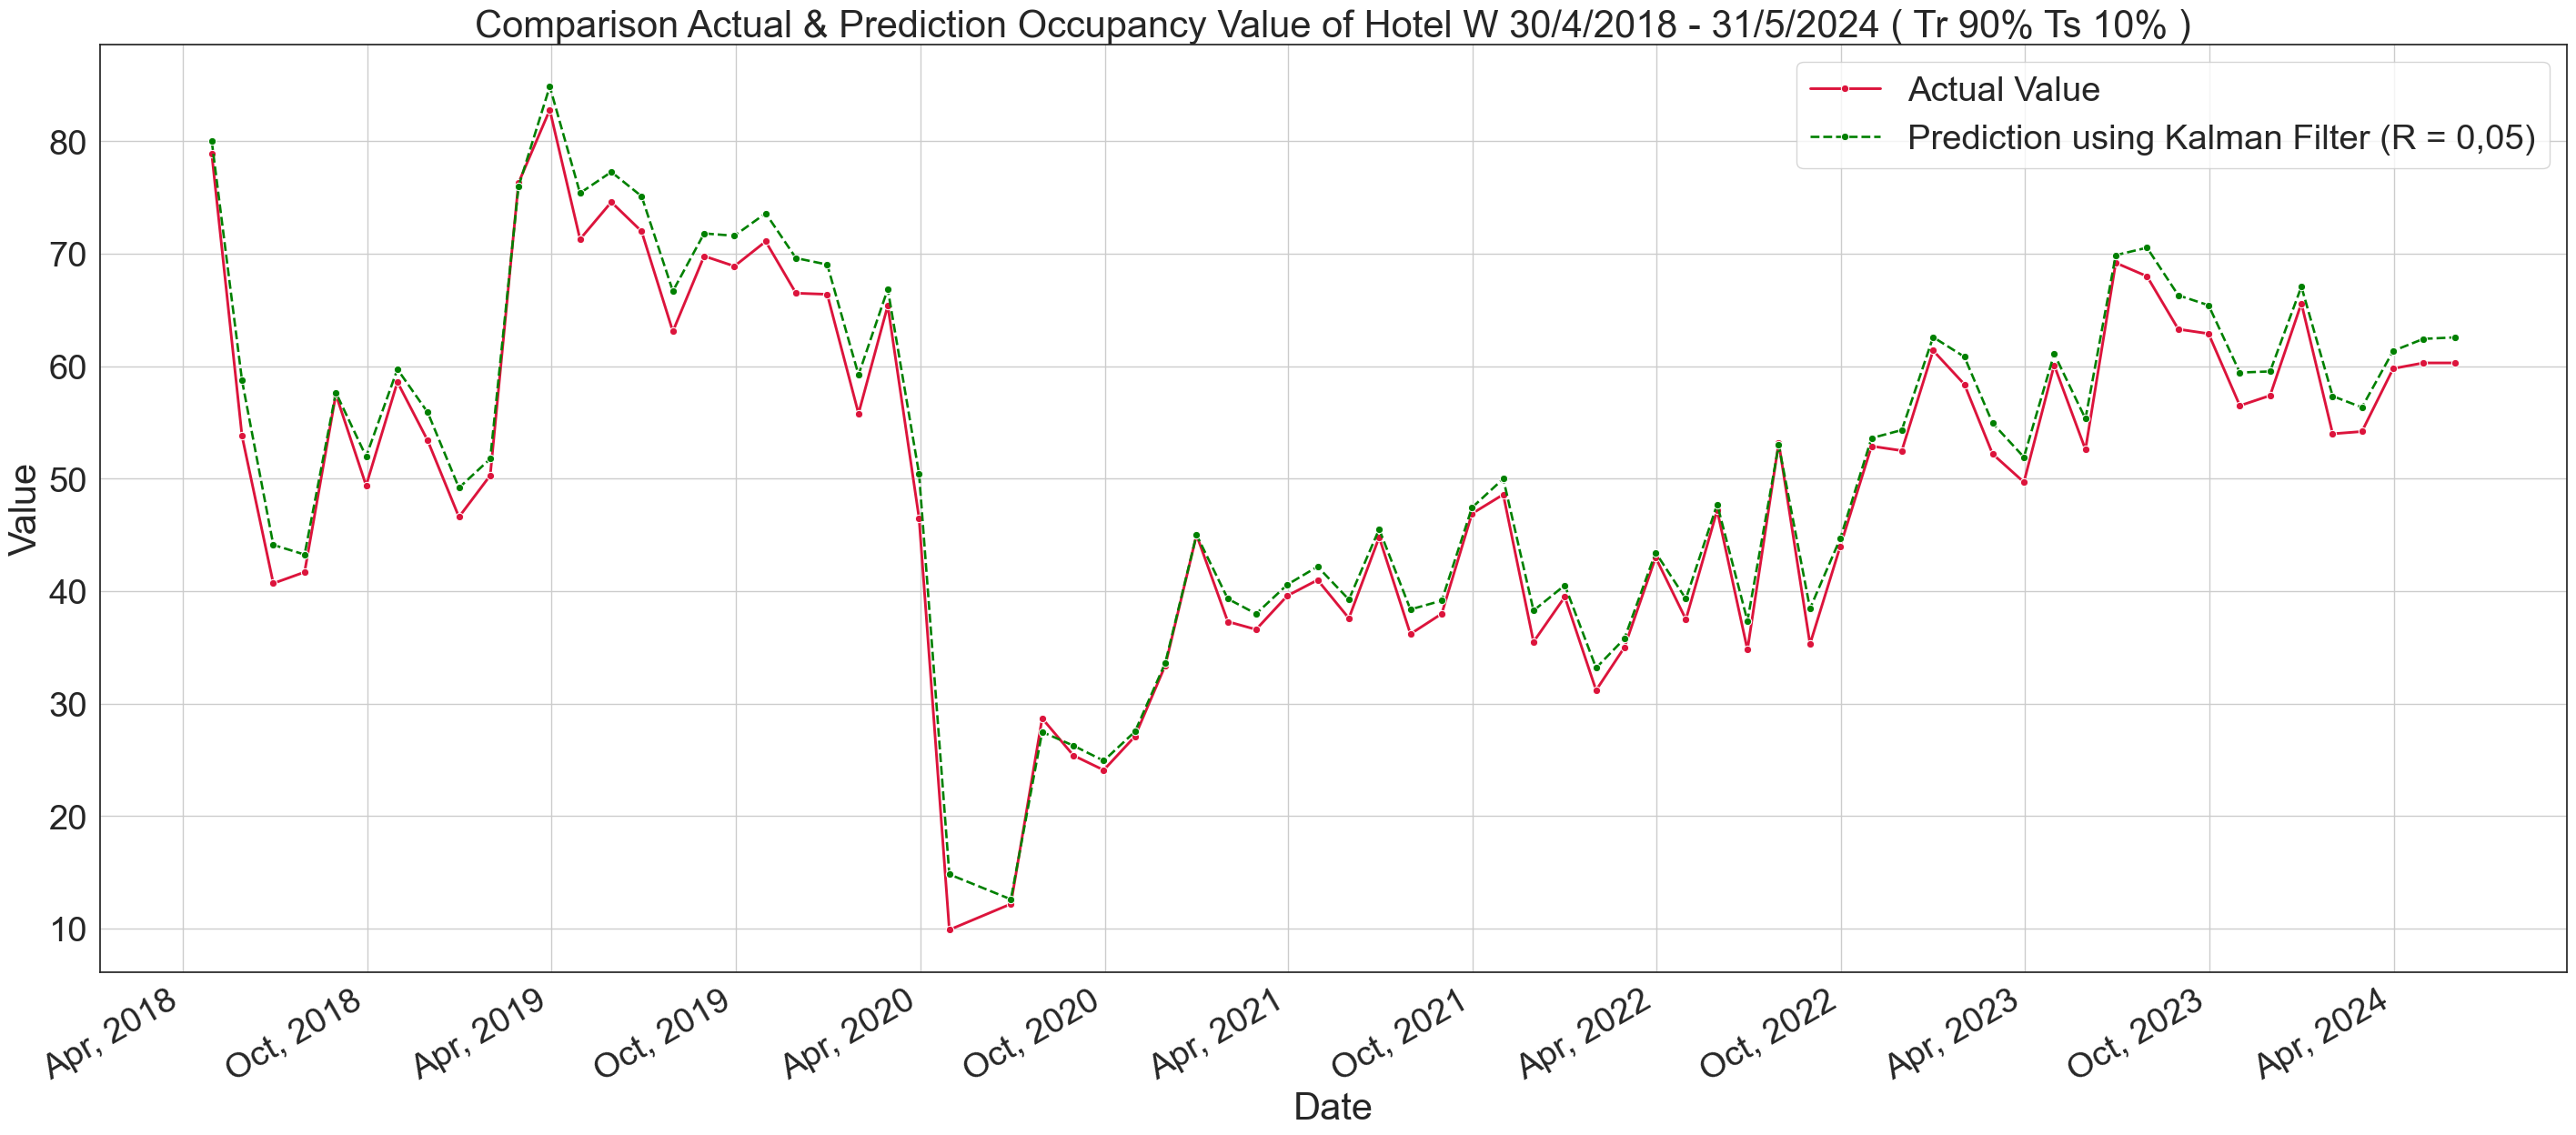

In [72]:
half_year_locator = mdates.MonthLocator(interval=6)
year_month_formatter = mdates.DateFormatter("%Y-%m")
month_year_formatter = mdates.DateFormatter('%b, %Y')

fig,ax = plt.subplots(figsize=(35,15))
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)
ax.xaxis.set_major_formatter(month_year_formatter)

fig.autofmt_xdate()

# plt.figure(figsize=(25,7))
sns.set_theme(style='white',font_scale=2.5)


sns.lineplot(x=df['DATE'],y=df['OCCUP'],data=df,linestyle='solid',color='crimson',linewidth=2.1,marker='o',label='Actual Value')

sns.lineplot(x=df['DATE'],y=df['Prediction KF 90-10'],data=df,linestyle='dashed',color='green',linewidth=1.9,marker='o',label='Prediction using Kalman Filter (R = 0,05)')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison Actual & Prediction Occupancy Value of Hotel W 30/4/2018 - 31/5/2024 ( Tr 90% Ts 10% )')
plt.grid(True)
plt.show()


In [73]:
df['Prediction KF 90-10'].values

array([80.0132529 , 58.73842702, 44.12188779, 43.26263366, 57.66676295,
       51.98048797, 59.73703769, 55.90532388, 49.19513042, 51.77669094,
       75.96558517, 84.87594086, 75.3994577 , 77.27730204, 75.11817222,
       66.68302082, 71.80961064, 71.60661609, 73.60211794, 69.62076187,
       69.04476132, 59.24108029, 66.86421803, 50.43601788, 14.82959649,
       12.61150441, 27.49317215, 26.27265382, 24.93047875, 27.52205838,
       33.62230513, 45.01605858, 39.33099788, 37.99684894, 40.58940463,
       42.19026028, 39.26283195, 45.51835117, 38.38198779, 39.16701379,
       47.43506003, 50.00159387, 38.28440907, 40.53254817, 33.18432636,
       35.78012281, 43.44193678, 39.32322195, 47.72953674, 37.36531646,
       53.00103914, 38.46551899, 44.68677587, 53.61592368, 54.33449292,
       62.59445734, 60.84415201, 54.9380396 , 51.92412735, 61.10758461,
       55.33738264, 69.87890402, 70.54538174, 66.31057595, 65.42827311,
       59.44406526, 59.54276465, 67.08455941, 57.34981844, 56.34

In [74]:
df['OCCUP'].values

array([78.9, 53.8, 40.7, 41.7, 57.5, 49.4, 58.6, 53.4, 46.6, 50.3, 76.3,
       82.8, 71.3, 74.6, 72. , 63.1, 69.8, 68.9, 71.1, 66.5, 66.4, 55.8,
       65.4, 46.5,  9.9, 12.2, 28.7, 25.4, 24.1, 27.1, 33.4, 45. , 37.3,
       36.6, 39.6, 41. , 37.6, 44.8, 36.2, 38. , 46.9, 48.6, 35.5, 39.5,
       31.2, 35. , 43. , 37.5, 47.2, 34.8, 53.2, 35.3, 44. , 52.9, 52.5,
       61.4, 58.4, 52.2, 49.7, 60.1, 52.6, 69.2, 68. , 63.3, 62.9, 56.5,
       57.4, 65.6, 54. , 54.2, 59.8, 60.3, 60.3])

In [76]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse_kf = mean_squared_error(y_pred=df['Prediction KF 90-10'].values,y_true=df['OCCUP'].values)
rmse_kf = sqrt(mse_kf)

print('MSE KF Final : ',mse_kf)
print('RMSE KF Final : ',rmse_kf)

MSE KF Final :  4.902491366505123
RMSE KF Final :  2.214157032937168
